In [1]:
import pandas as pd
from sklearn.cross_validation import train_test_split

from read import read_file
from describe import create_var_dict, diff_in_mean, x_dist, comparison_all_values
from process import check_missing_value, fill_in
from create_dummy import discretize, create_dummy
from logit import all_data, logit_regression
from evaluate import summary, plot_roc

%matplotlib inline

C:\Users\yulp7\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Step 1: Read Data
df = read_file("credit-data.csv")

In [3]:
df

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,60644,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,60637,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,60601,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,60601,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,60625,1,0.024926,63588.0,7,0,1,0,0.0
5,6,0,0.213179,74,60629,0,0.375607,3500.0,3,0,1,0,1.0
6,7,0,0.305682,57,60637,0,5710.000000,NaN,8,0,3,0,0.0
7,8,0,0.754464,39,60625,0,0.209940,3500.0,8,0,0,0,0.0
8,9,0,0.116951,27,60804,0,46.000000,NaN,2,0,0,0,NaN
9,10,0,0.189169,57,60629,0,0.606291,23684.0,9,0,4,0,2.0


In [4]:
#Step 2: Explore Data
d = create_var_dict(df, 2)  #independent variable is in the 2nd column

y: SeriousDlqin2yrs
x1: RevolvingUtilizationOfUnsecuredLines
x2: age
x3: zipcode
x4: NumberOfTime30-59DaysPastDueNotWorse
x5: DebtRatio
x6: MonthlyIncome
x7: NumberOfOpenCreditLinesAndLoans
x8: NumberOfTimes90DaysLate
x9: NumberRealEstateLoansOrLines
x10: NumberOfTime60-89DaysPastDueNotWorse
x11: NumberOfDependents


In [5]:
diff_in_mean(df, [2,6,11], d)
diff_in_mean(df, [4,10,8], d)
diff_in_mean(df, [1,5,7,9], d)

                        age  MonthlyIncome  NumberOfDependents
SeriousDlqin2yrs                                              
0                 52.751375    6747.837774            0.743417
1                 45.926591    5630.826493            0.948208
                  NumberOfTime30-59DaysPastDueNotWorse  \
SeriousDlqin2yrs                                         
0                                             0.280109   
1                                             2.388490   

                  NumberOfTime60-89DaysPastDueNotWorse  \
SeriousDlqin2yrs                                         
0                                             0.126666   
1                                             1.828047   

                  NumberOfTimes90DaysLate  
SeriousDlqin2yrs                           
0                                0.135225  
1                                2.091362  
                  RevolvingUtilizationOfUnsecuredLines   DebtRatio  \
SeriousDlqin2yrs                    

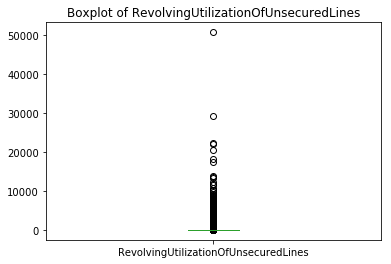

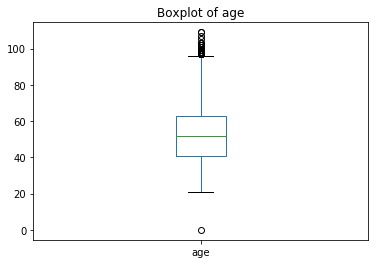

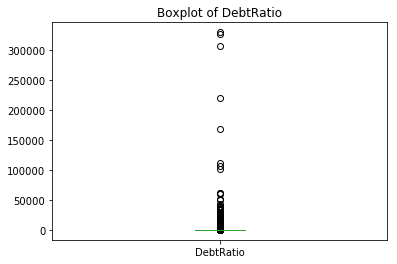

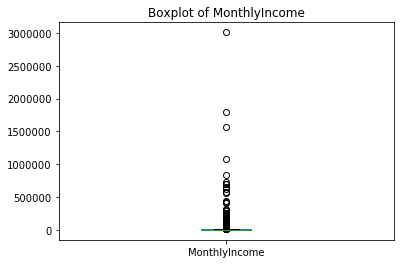

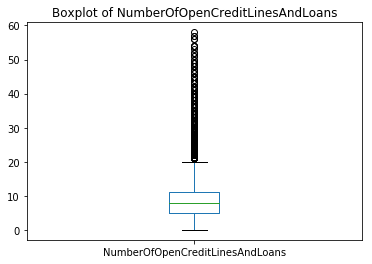

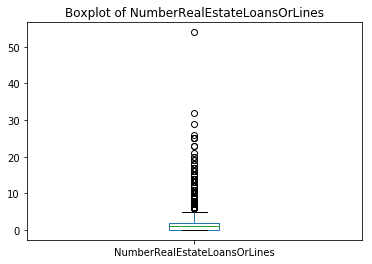

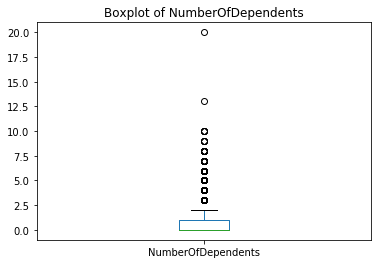

In [6]:
x_dist(df, [1,2,5,6,7,9,11],d)

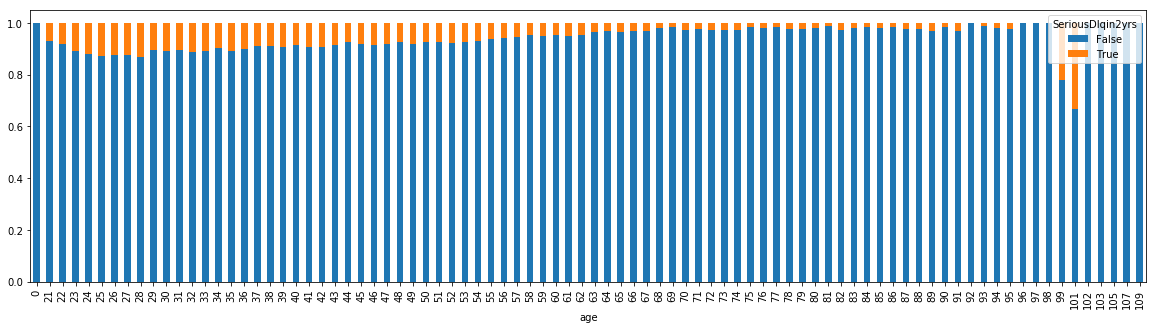

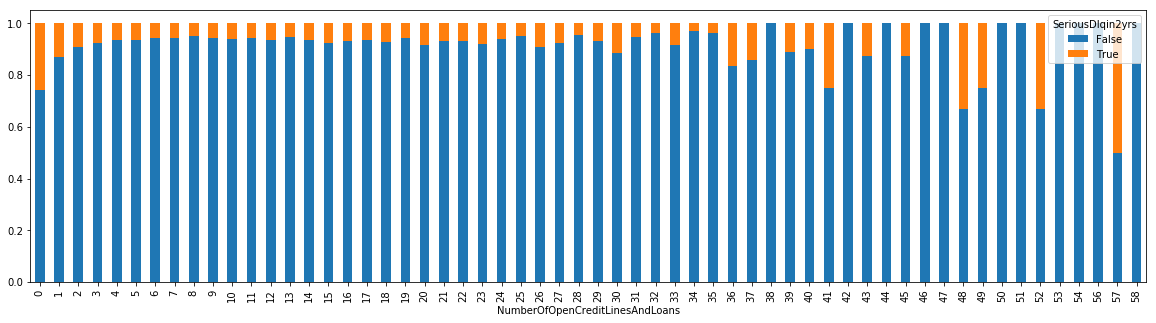

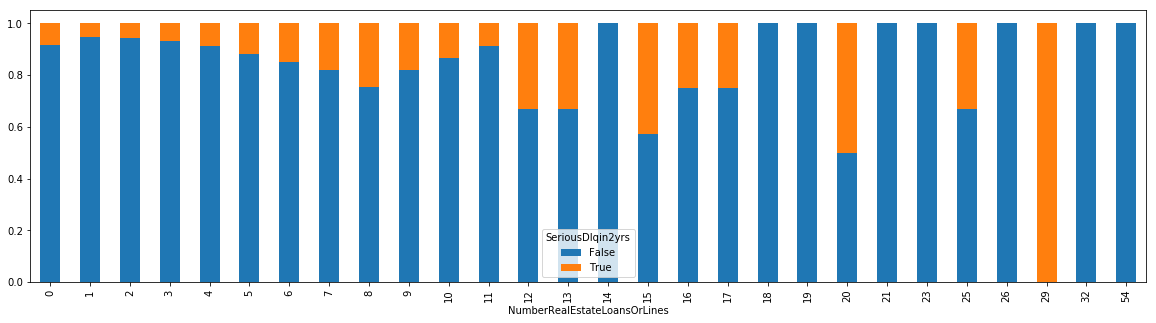

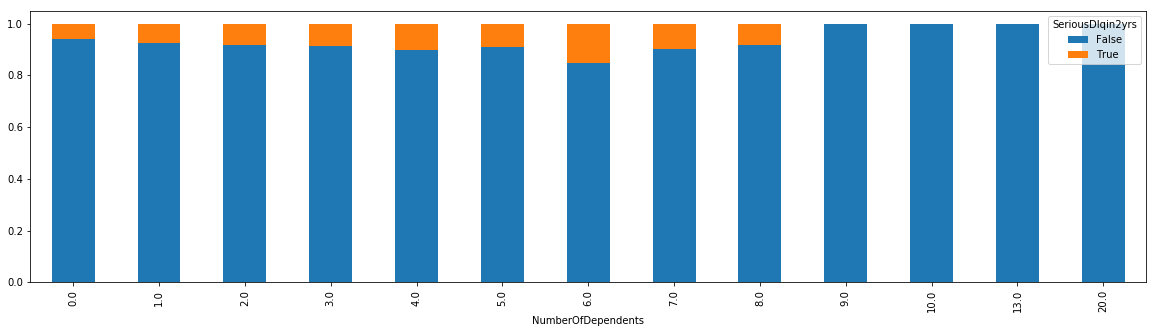

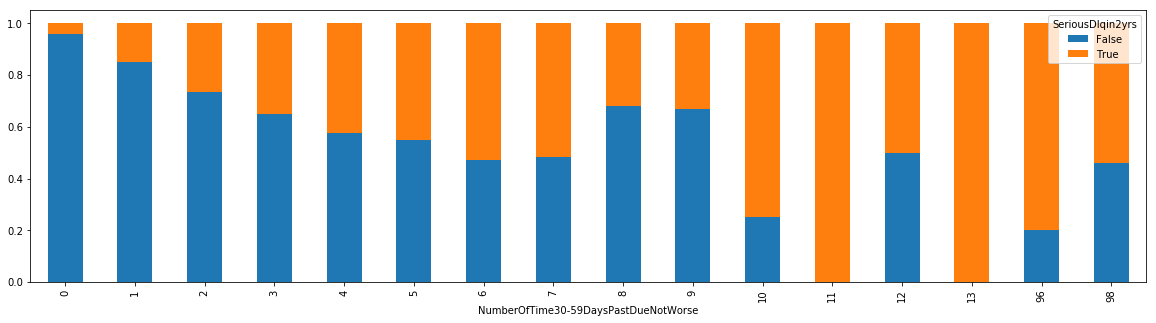

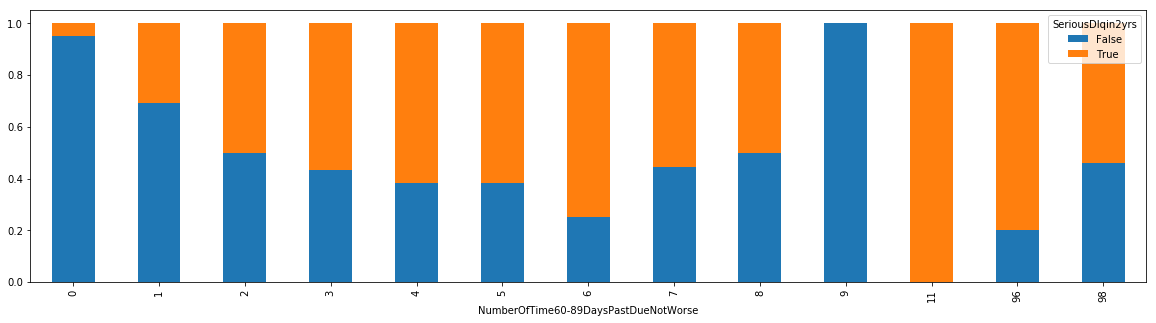

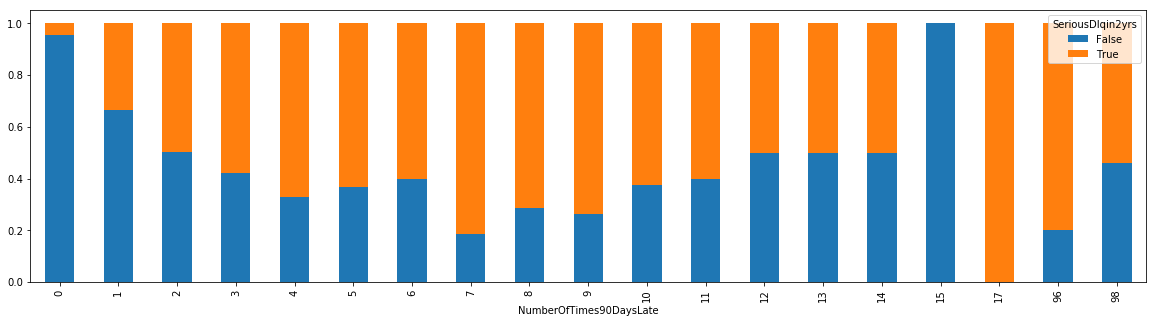

In [7]:
comparison_all_values(df, [2,7,9,11,4,10,8],d)

In [8]:
#Step 3: Fill missing value
check_missing_value(df)
fill_in(df, 6, d, 'mean')
fill_in(df, 11, d, 'mean')

MonthlyIncome has missing values.
NumberOfDependents has missing values.


In [9]:
#Step 4: Create dummy variables
headers = discretize(df, 2, d, 4)
create_dummy(df,2,d,headers)

In [10]:
df

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,age_cat,age: 0.0 to 25.0%tile,age: 25.0 to 50.0%tile,age: 50.0 to 75.0%tile,age: 75.0 to 100.0%tile
0,1,1,0.766127,45,60644,2,0.802982,9120.000000,13,0,6,0,2.000000,1,0,1,0,0
1,2,0,0.957151,40,60637,0,0.121876,2600.000000,4,0,0,0,1.000000,0,1,0,0,0
2,3,0,0.658180,38,60601,1,0.085113,3042.000000,2,1,0,0,0.000000,0,1,0,0,0
3,4,0,0.233810,30,60601,0,0.036050,3300.000000,5,0,0,0,0.000000,0,1,0,0,0
4,5,0,0.907239,49,60625,1,0.024926,63588.000000,7,0,1,0,0.000000,1,0,1,0,0
5,6,0,0.213179,74,60629,0,0.375607,3500.000000,3,0,1,0,1.000000,3,0,0,0,1
6,7,0,0.305682,57,60637,0,5710.000000,6670.221237,8,0,3,0,0.000000,2,0,0,1,0
7,8,0,0.754464,39,60625,0,0.209940,3500.000000,8,0,0,0,0.000000,0,1,0,0,0
8,9,0,0.116951,27,60804,0,46.000000,6670.221237,2,0,0,0,0.757222,0,1,0,0,0
9,10,0,0.189169,57,60629,0,0.606291,23684.000000,9,0,4,0,2.000000,2,0,0,1,0


In [11]:
#Step 5: Classifier (Logit model)
X, Y = all_data(df, [1,4,5,6,7,8,9,10,11,12,13,14,15], d)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
model = logit_regression(X_train, Y_train)

Accuracy = 0.932633333333
             precision    recall  f1-score   support

      False       0.93      1.00      0.97     27957
       True       0.58      0.04      0.07      2043

avg / total       0.91      0.93      0.90     30000



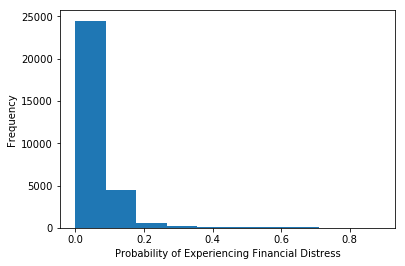

In [12]:
#Step 6:
summary(model, X_test, Y_test)

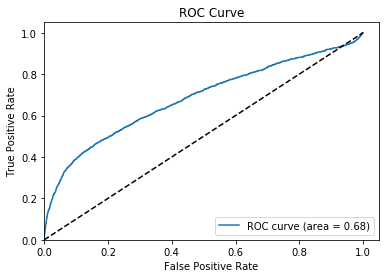

In [13]:
plot_roc(model.predict_proba(X_test)[:,1], Y_test)